# Introduction to dataset

The dataset present represents Google's stock price from 19th August 2004 when Google went public to 10th of November 2023 with stock price information of 4842 trading sessions. The dataset given has 7 different elements(represented in each column) which provides information about the trading activity and performance of a stock over a specific period. Here's a short overview of all the elements:

- **Date:** This column represents the calender date when the data about the stock is recorded.
- **Open:** This column represents the first recorded price of the stock for a trading session.
- **High:** The high price represents the highest traded price of the stock during a given trading session. It reflects the peak value that the stock reached during the day.
- **Low:** The low price is the lowest traded price of the stock during a specific trading session. It indicates the minimum value that the stock reached during the day.
- **Close:** The closing price is the last traded price of the stock at the end of a trading session. It reflects the final value at which the stock was traded before the market closes.
- **Adj Close(Adjusted Close):** The adjusted closing price accounts for corporate actions, such as dividends, stock splits, and new stock offerings, that may affect the stock's price but are not directly related to its performance. The adjusted close is often used to assess the stock's performance over time.
- **Volume:** Volume represents the total number of shares traded during a specific time period. It gives an indication of the level of market activity and liquidity for that stock. High volume often suggests increased investor interest, while low volume may indicate less active trading.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('google_stock_price.csv')

In [51]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [52]:
data_frame = data.copy()
data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4842.000000,4842.000000,4842.000000,4842.000000,4842.000000,4.842000e+03
mean,41.164402,41.601906,40.745188,41.181457,41.181457,1.192432e+08
std,38.267895,38.708231,37.871644,38.295204,38.295204,1.513840e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.819761,12.949089,12.702388,12.828043,12.828043,2.867350e+07
50%,26.470161,26.668148,26.259000,26.470153,26.470153,6.202500e+07
75%,57.197751,57.729501,56.633139,57.315001,57.315001,1.469819e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [53]:
float_formatter = lambda x: x.apply("{0:.3f}".format)

data_frame.describe().T.apply(float_formatter)

,count,mean,std,min,25%,50%,75%,max
Open,4842.000,41.164,38.268,2.470,12.820,26.470,57.198,151.863
High,4842.000,41.602,38.708,2.534,12.949,26.668,57.730,152.100
Low,4842.000,40.745,37.872,2.390,12.702,26.259,56.633,149.887
Close,4842.000,41.181,38.295,2.491,12.828,26.470,57.315,150.709
Adj Close,4842.000,41.181,38.295,2.491,12.828,26.470,57.315,150.709
Volume,4842.000,119243199.317,151383997.268,158434.000,28673500.000,62025000.000,146981866.750,1650832619.000


Text(0.5, 1.0, 'Stock Price of Google over the Years')

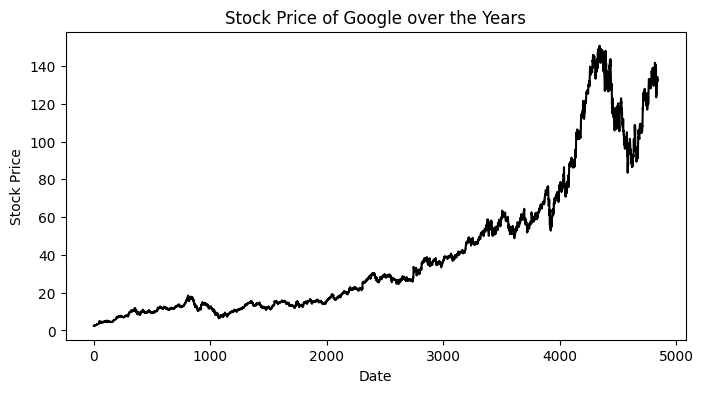

In [54]:
plt.figure(figsize=(8,4))
plt.plot(data_frame['Close'], label='Close Price history',color='black')
plt.xlabel('Date',size=10)
plt.ylabel('Stock Price',size=10)
plt.title('Stock Price of Google over the Years',size=12)

### Supervised Learning Task
#### Regression

**Predicting Closing Price**

- *Target Variable:* Close or Adjusted Close
- *Features:* Open, High, Low, Volume
- *Objective:* Train a regression model to predict the closing price or adjusted closing price of Google's stock for a given trading session based on the opening price, highest and lowest prices, and trading volume.

#### Approach

We will employ 4 types of regression models:
1. linear
2. decision tree
3. random forest 
4. kernel (using RBF and linear kernels)

Also, we will compare their performance results on out dataset.

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [56]:
# ProjectRegressor is a utility class to refactor the logic of 
# fitting and predicting data using different models.
class ProjectRegressor:
    def __init__(self, model_name, model, features, target, scale=False) -> None:
        self.model_name = model_name
        self.model = model
        self.features = features
        self.target = target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.features,
            self.target,
            test_size=0.2,
            random_state=42
        )
        if scale:
            scaler = StandardScaler()
            self.X_train = scaler.fit_transform(self.X_train)
            self.X_test = scaler.transform(self.X_test)

    def fit(self) -> None:
        self.model.fit(self.X_train, self.y_train)
    
    def predict(self):
        return self.model.predict(self.X_test)
    
    def mse(self, y_pred):
        return mean_squared_error(self.y_test, y_pred)
    
    def cross_val_mse(self, cv=5):
        # Perform cross-validation and return the mean squared error
        cv_scores = cross_val_score(self.model, self.features, self.target, cv=cv, scoring='neg_mean_squared_error')
        return -cv_scores.mean()

    def plot(self, y_pred):
        # Evaluate the model
        mse = self.mse(y_pred=y_pred)
        
        # Embed MSE information in the plot
        mse_text_linear = f'MSE: {mse:.3f}'
        plt.annotate(mse_text_linear, xy=(0.7, 0.5), xycoords='axes fraction', fontsize=10, color='blue')

        # Visualize predicted vs. actual closing prices
        plt.scatter(self.y_test, y_pred, s=10, label="Actual vs. Predicted")
        plt.plot([min(self.y_test), max(self.y_test)], [min(self.y_test), max(self.y_test)], color='red', linestyle='--', label="y=x Line")

        plt.xlabel("Actual Closing Price")
        plt.ylabel("Predicted Closing Price")
        plt.title(f"Actual vs. Predicted Closing Price ({self.model_name})")
        plt.legend()
        plt.show()

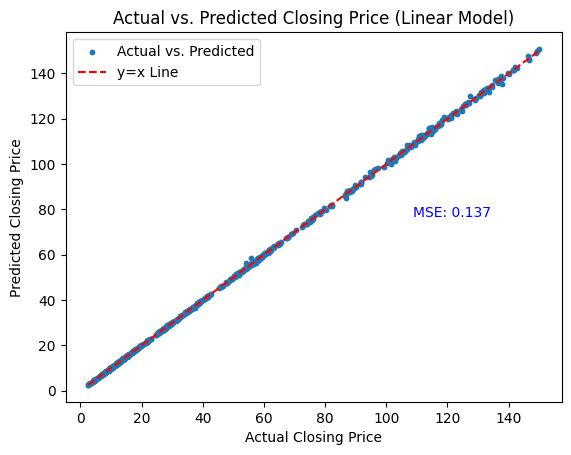

Linear Model Cross-Validation MSE: 0.126


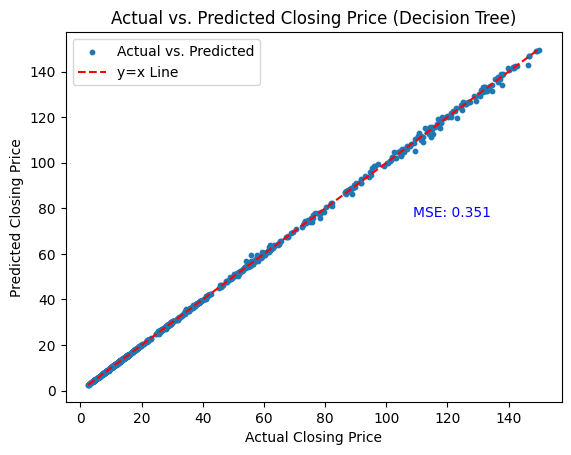

Decision Tree Cross-Validation MSE: 413.242


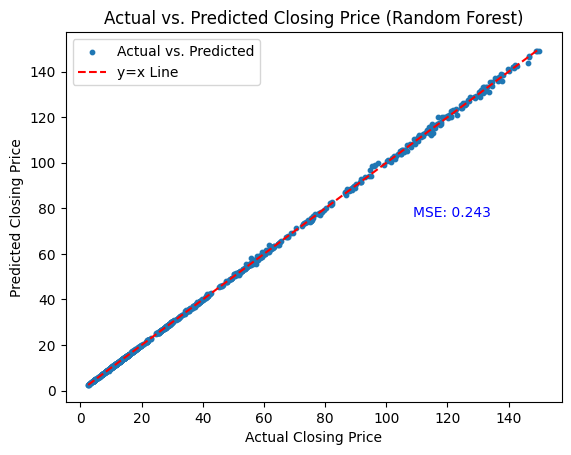

Random Forest Cross-Validation MSE: 418.962


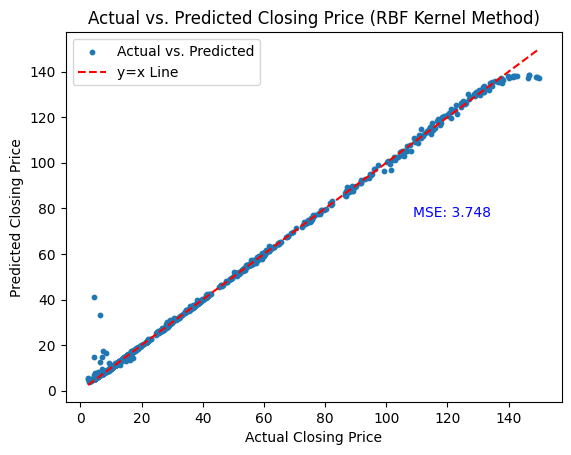

RBF Kernel Method Cross-Validation MSE: 1242.800


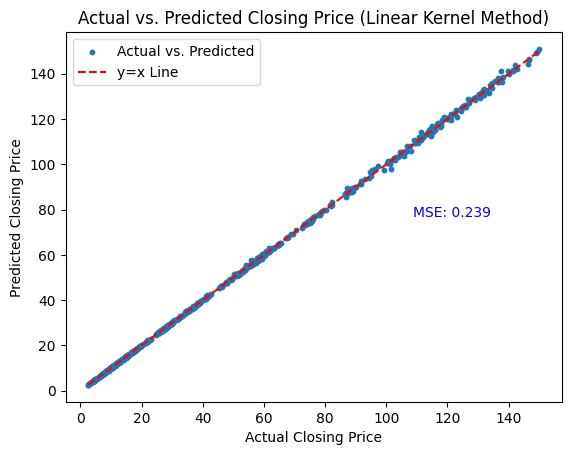

In [57]:
# Select features (Open, High, Low, Volume) and target variable (Close or Adjusted Close)
features = data_frame[['Open', 'High', 'Low', 'Volume']]
target = data_frame['Close']  # or 'Adjusted Close' depending on your preference

linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
svr_rbf_model = SVR(kernel='rbf')
svr_lin_model = SVR(kernel='linear')

lm_regressor = ProjectRegressor(model_name='Linear Model', model=linear_model, features=features, target=target)
dt_regressor = ProjectRegressor(model_name='Decision Tree', model=decision_tree_model, features=features, target=target)
rf_regressor = ProjectRegressor(model_name='Random Forest', model=random_forest_model, features=features, target=target)
svr_rbf_regressor = ProjectRegressor(model_name='RBF Kernel Method', model=svr_rbf_model, features=features, target=target, scale=True)
svr_lin_regressor = ProjectRegressor(model_name='Linear Kernel Method', model=svr_lin_model, features=features, target=target, scale=True)

models = [lm_regressor, dt_regressor, rf_regressor, svr_rbf_regressor, svr_lin_regressor]

for i, model in enumerate(models):
    model.fit()
    y_pred = model.predict()
    model.plot(y_pred=y_pred)
    # Apply cross-validation and print the result
    if i < len(models) - 1:
        cv_mse = model.cross_val_mse()
        print(f'{model.model_name} Cross-Validation MSE: {cv_mse:.3f}')

The results suggests that the linear model performs better on our dataset with the lowest MSE as shown in the table below (and also the cross validation scores printed).

| | Linear Model    | Decision Tree | Random Forest   | Kernel Method (RBF) | Kernel Method (Linear)
|---------|-----|----------------|---|---|---|
| MSE   | 0.137  | 0.351 | 0.243 | 3.748 | 0.239


## Unsupervised Learning Task

### Dimensionality Reduction using PCA (Principal Component Analysis):

**Task:** Reduce the dimensionality of the dataset while retaining as much information as possible.
Implementation: Apply PCA to the features (Open, High, Low, Volume) to create new, uncorrelated features (principal components) that capture the most significant variance in the data.
**Benefits:** Reduced dimensionality can simplify the dataset, facilitate visualization, and potentially improve the efficiency of subsequent tasks.

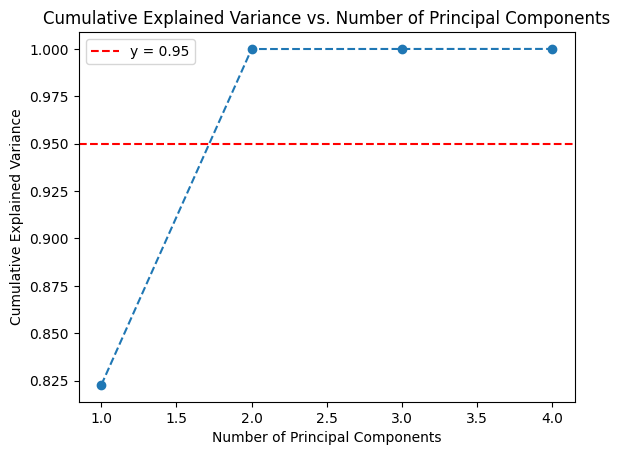

Number of components to retain for 95% explained variance: 2
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

        PC1       PC2  
0 -3.374675  4.254243  
1 -2.398051  1.526755  
2 -2.185922  0.957190  
3 -2.054243  0.580124  
4 -1.787534 -0.178626  


In [58]:
import numpy as np
from sklearn.decomposition import PCA

df = data.copy()

# Select features for PCA
features = df[['Open', 'High', 'Low', 'Volume']]

# Standardize the features (important for PCA)
# PCA is a variance-based method, and the variance of features affects the principal components. 
# If features have different scales, those with larger scales may dominate the principal components, leading to biased results. 
# Standardizing features prevents this issue.
features_standardized = (features - features.mean()) / features.std()

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

desired_explained_variance = 0.95

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=desired_explained_variance, color='red', linestyle='--', label='y = 0.95')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.legend()
plt.show()

# Determine the number of components to retain based on explained variance
num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1

print(f'Number of components to retain for {desired_explained_variance:.0%} explained variance: {num_components}')

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=num_components)
principal_components_final = pca_final.fit_transform(features_standardized)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components_final, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Concatenate the principal components with the original dataset
df_pca = pd.concat([df, principal_df], axis=1)

# Display the resulting DataFrame with principal components
print(df_pca.head())

### Interpretation

From the figure, we can see that 2 dimensions would be enough to reach the desired variance level.

### Autoencoders for Dimensionality Reduction

1. **Architecture:**
   - Consists of an encoder and a decoder, both neural networks.
   - Symmetric architecture with a bottleneck layer called the "latent space."

2. **Encoder:**
   - Maps input data to a lower-dimensional representation in the latent space.
   - Hidden layers progressively reduce dimensionality.

3. **Bottleneck Layer (Latent Space):**
   - Contains the compressed representation of the input data.
   - Has lower dimensionality, capturing salient features.

4. **Decoder:**
   - Reconstructs input data from the compressed representation.
   - Hidden layers progressively increase dimensionality.

5. **Objective Function:**
   - Minimizes reconstruction error, typically measured using Mean Squared Error.
   - Aims to make the reconstructed output close to the original input.

6. **Unsupervised Learning:**
   - Trained without labeled data.
   - Learns to encode and decode patterns in the data.

7. **Applications:**
   - Dimensionality reduction, feature learning, data denoising, and anomaly detection.

8. **Hyperparameter Tuning:**
   - Adjust hidden layers, neurons per layer, and latent space dimensionality for optimal performance.


Epoch 1/50
122/122 [==============================] - 0s 1ms/step - loss: 0.6690 - val_loss: 0.4298
Epoch 2/50
122/122 [==============================] - 0s 2ms/step - loss: 0.2841 - val_loss: 0.0746
Epoch 3/50
122/122 [==============================] - 0s 686us/step - loss: 0.0260 - val_loss: 0.0045
Epoch 4/50
122/122 [==============================] - 0s 610us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 5/50
122/122 [==============================] - 0s 611us/step - loss: 0.0012 - val_loss: 9.1957e-04
Epoch 6/50
122/122 [==============================] - 0s 616us/step - loss: 8.3159e-04 - val_loss: 8.8074e-04
Epoch 7/50
122/122 [==============================] - 0s 611us/step - loss: 6.8982e-04 - val_loss: 6.1181e-04
Epoch 8/50
122/122 [==============================] - 0s 606us/step - loss: 5.7338e-04 - val_loss: 6.1122e-04
Epoch 9/50
122/122 [==============================] - 0s 637us/step - loss: 5.1206e-04 - val_loss: 4.5929e-04
Epoch 10/50
122/122 [=============================

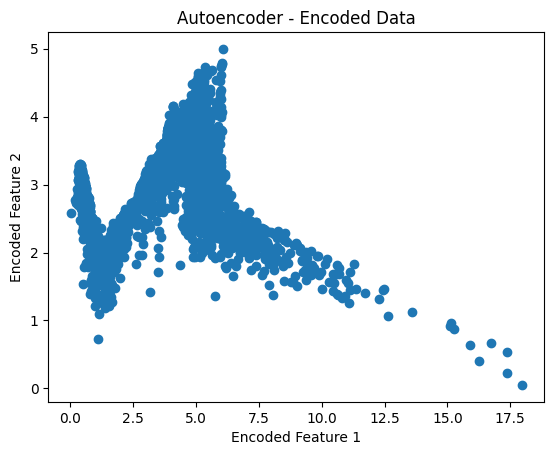

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('google_stock_price.csv')

# Set a random seed for reproducibility
np.random.seed(42)

# Select features (Open, High, Low, Volume)
features = df[['Open', 'High', 'Low', 'Volume']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(features_standardized, test_size=0.2, random_state=42)

# Autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 2  # Set the desired size of the encoding (you can experiment with this)
activation_function = 'relu'

# Encoder
encoder = Sequential([
    Dense(64, activation=activation_function, input_shape=(input_dim,)),
    Dense(encoding_dim, activation=activation_function)
])

# Decoder
decoder = Sequential([
    Dense(64, activation=activation_function, input_shape=(encoding_dim,)),
    Dense(input_dim, activation='linear')
])

# Autoencoder (combining encoder and decoder)
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Encode the data using the trained autoencoder
encoded_data = encoder.predict(features_standardized)

# Create a DataFrame with the encoded data
df_encoded = pd.DataFrame(data=encoded_data, columns=['Encoded1', 'Encoded2'])

# Concatenate the encoded data with the original dataset
df_autoencoder = pd.concat([df, df_encoded], axis=1)

# Display the resulting DataFrame with encoded data
print(df_autoencoder.head())

# Plot the encoded data
plt.scatter(df_autoencoder['Encoded1'], df_autoencoder['Encoded2'])
plt.title('Autoencoder - Encoded Data')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()

### Interpretation

We can see that data points are compressed to fairly dense clusters which means that the encoder could successfully compress and capture most important informations. The data points that seemingly does not belong to any cluster are possible outliers that express abnormal behaviour in the data.

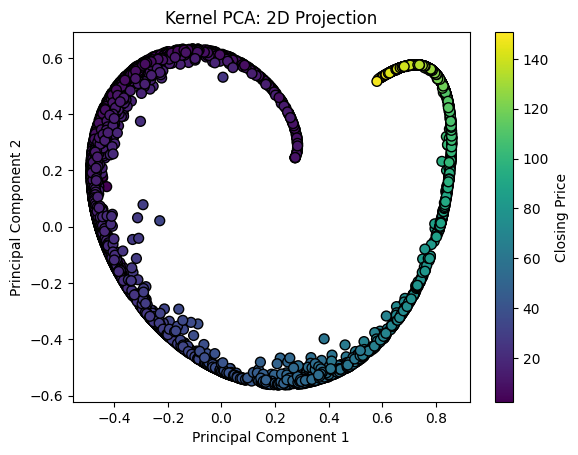

In [60]:
from sklearn.decomposition import KernelPCA

# Assuming you have a DataFrame named 'df' with columns: Open, High, Low, Close, Adjusted Close, Volume
# Extracting features and target
features = df[['Open', 'High', 'Low', 'Volume']]
target = df['Close']  # or 'Adjusted Close' depending on your preference

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize and fit Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # 'rbf' stands for radial basis function (Gaussian kernel)
features_kpca = kpca.fit_transform(features_scaled)

# Plot the reduced-dimensional data
plt.scatter(features_kpca[:, 0], features_kpca[:, 1], c=target, cmap='viridis', edgecolor='k', s=50)
plt.title('Kernel PCA: 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Closing Price')
plt.show()


### Interpretation

We can see from the figure how kernel PCA captures important trends in the data (illustrated by colors) on a 2D curve.